In [ ]:
# -*- coding: utf-8 -*-
# Created on Mon Dec 27 15:23:15 2021
# @author: Leonimer
# gradiente descendente

# Gradient Descent

Gradient descent is an optimization algorithm used to find the values of parameters (coefficients) of a function (f) that minimizes a cost function (cost).

Gradient descent is best used when the parameters cannot be calculated analytically (e.g. using linear algebra) and must be searched for by an optimization algorithm.

Gradient Descent is known as one of the most commonly used optimization algorithms to train machine learning models by means of minimizing errors between actual and expected results. Further, gradient descent is also used to train Neural Networks.

In mathematical terminology, Optimization algorithm refers to the task of minimizing/maximizing an objective function f(x) parameterized by x. Similarly, in machine learning, optimization is the task of minimizing the cost function parameterized by the model's parameters. The main objective of gradient descent is to minimize the convex function using iteration of parameter updates. Once these machine learning models are optimized, these models can be used as powerful tools for Artificial Intelligence and various computer science applications.

##Minimizing the Cost with Gradient Descent

Assume we have a total of $n$ features. In this case, we have $n$ parameters for the $\theta$ vector. To minimize our cost function, we need to run the gradient descent on each parameter $\theta_j$:

$$\theta_j \gets \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta), $$

where $J(\theta)$ is the cost(loss) function, $\alpha$ is the `learning rate` and $\theta$ are here represented by the `weight` vector ($w$).

##Local minimum
Gradient Descent is defined as one of the most commonly used iterative optimization algorithms of machine learning to train the machine learning and deep learning models. It helps in finding the local minimum of a function.

The best way to define the local minimum or local maximum of a function using gradient descent is as follows:

*   If we move towards a negative gradient or away from the gradient of the
function at the current point, it will give the local minimum of that function.
*   Whenever we move towards a positive gradient or towards the gradient of the function at the current point, we will get the local maximum of that function.
   


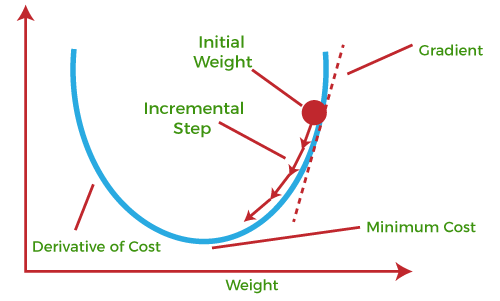

This entire procedure is known as Gradient Ascent, which is also known as steepest descent. The main objective of using a gradient descent algorithm is to minimize the cost function using iteration. To achieve this goal, it performs two steps iteratively:

1. Calculates the first-order derivative of the function to compute the gradient or slope of that function.

2. Move away from the direction of the gradient, which means slope increased from the current point by `alpha` times, where `alpha` (or `eta`) is defined as `Learning Rate`. It is a tuning parameter in the optimization process which helps to decide the length of the steps.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Escolhendo uma fun√ß√£o para demostra√ß√£o do Gradiente Descente:
$$f(x)=6x^2-12x+3 $$

In [ ]:
#fun√ß√£o alg√©brica f(x) = 6x^2 - 12x + 3
def f(x):
    return 6*x**2 - 12*x + 3

Derivada alg√©brida de $f(x)$:
$$\frac{df(x)}{dx}=12x-12$$

In [ ]:
#derivada alg√©brica de f(x) --> df(x)/dx = 12x - 12
def d(x):
    return 12*x - 12

Derivada num√©rica de $f(x)$:
$$\frac{d}{dx}f(x)=\frac{Œîf(x)}{Œîx}=\frac{f(x_1)-f(x_0)}{x_1-x_0} $$

In [ ]:
#defivada num√©rica dfx = (fx1 - fx0) / (x1 - x0)
def dn(x):
    d_fx = []
    x0 = x[0]
    fx0 = f(x0)
    dim = x.shape[0]

    for n in range(1,dim):
        x1 = x[n]
        fx1 = f(x1)
        dfx = (fx1 - fx0) / (x1 - x0)
        d_fx.append(dfx)
        x0 = x1
        fx0 = fx1

    return d_fx

###Gradiente Descendente num√©rico

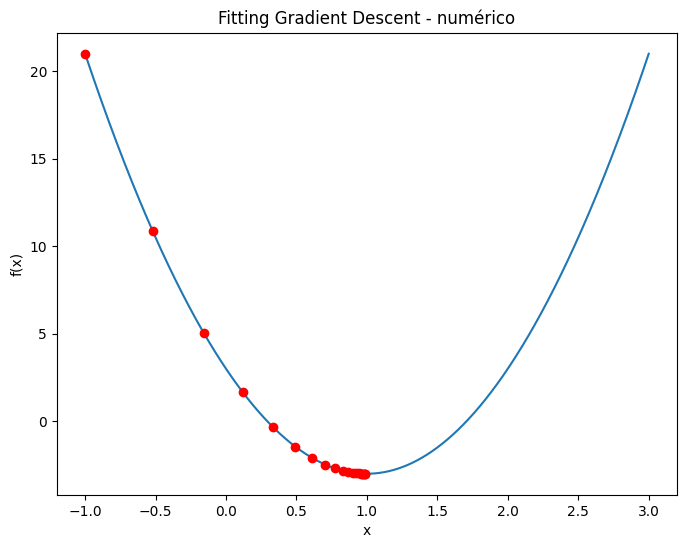

In [ ]:
#vetor x
x = np.linspace(-1,3,1000)

#fun√ß√£o f(x) num√©rica vetorial
fx = f(x)

plt.figure(figsize = (8,6))
# plotting f(x) function
plt.plot(x,fx)
#fitting com fun√ß√£o derivada num√©rica
x_ = -1
eta = 0.02
epochs = 20
dnFx = dn(x)
for i in range(epochs):
    plt.plot(x_, f(x_), marker='o', color='r')
    # Returns the index of the minimum value --> cost(loss) function
    idx = (np.abs(x - x_)).argmin()
    # c√°lculo do gradiente descendente
    x_ = x_ - eta * dnFx[idx]

plt.title("Fitting Gradient Descent - num√©rico")
plt.ylabel("f(x)")
plt.xlabel("x")
plt.show()

###Gradiente Descendente alg√©brico

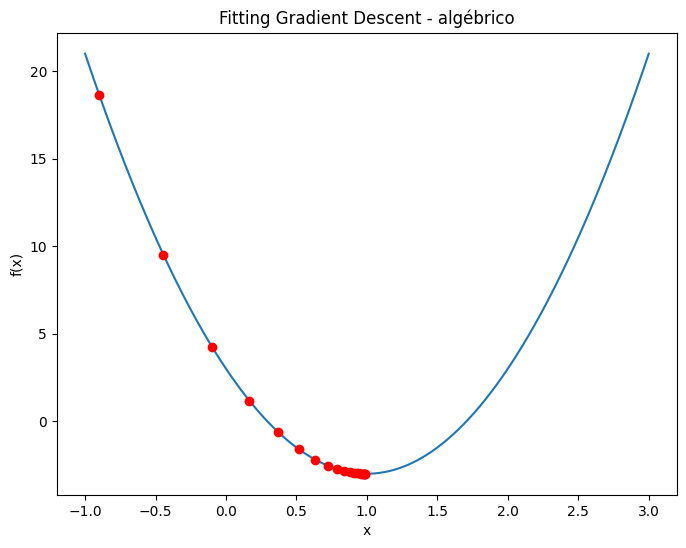

In [ ]:
plt.figure(figsize = (8,6))
# plotting f(x) function
plt.plot(x,fx)
#fiting
x_ = -0.9
eta = 0.02
epochs = 20
for i in range(epochs):
    plt.plot(x_, f(x_), marker='o', color='r')
    # c√°lculo do gradiente descendente
    x_ = x_ - eta * d(x_)

plt.title("Fitting Gradient Descent - alg√©brico")
plt.ylabel("f(x)")
plt.xlabel("x")
plt.show()

###Overfitting

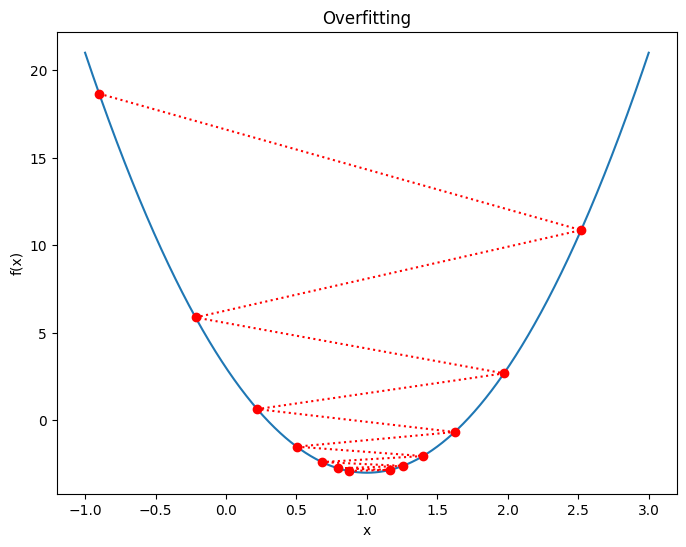

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(x,f(x))
# overfitting
x_ = -0.9
eta = 0.15
epochs = 12
xa=[]
fxa=[]
xa.append(x_)
fxa.append(f(x_))
for i in range(epochs):
    x_ = x_ - eta * d(x_)
    #plt.plot(x_, f(x_), marker='o', color='r')
    xa.append(x_)
    fxa.append(f(x_))

plt.plot(xa, fxa, 'o:r')
plt.title("Overfitting")
plt.ylabel("f(x)")
plt.xlabel("x")
plt.show()

###Underfitting

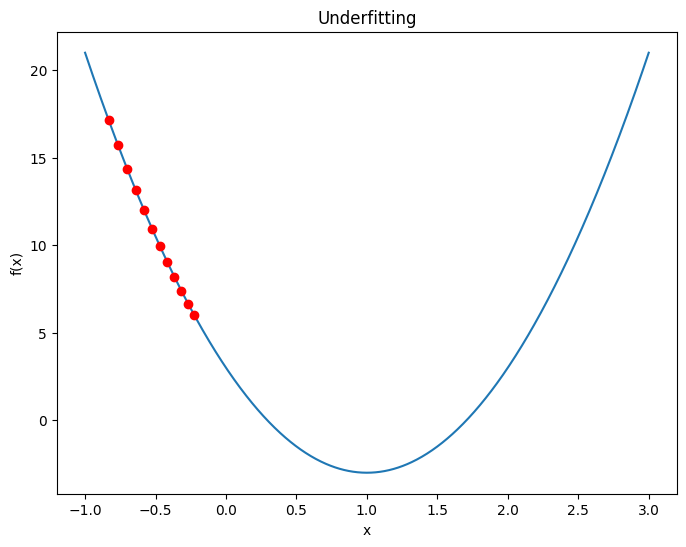

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(x,f(x))
# underfitting
x_ = -0.9
eta = 0.003
epochs = 12

for i in range(epochs):
    x_ = x_ - eta * d(x_)
    plt.plot(x_, f(x_), marker='o', color='r')

plt.title("Underfitting")
plt.ylabel("f(x)")
plt.xlabel("x")
plt.show()

###Exemplo de descida do gradiente
Aplique o algoritmo da Descida do Gradiente na fun√ß√£o de custo $ùêø = (ùë• ‚àí ùë•_ùëì )^2$ , onde ‚Äú$ùë•$‚Äù √© a
vari√°vel a ser otimizada que deve ser inicializada de forma aleat√≥ria e ‚Äú$ùë•_ùëì = 10$‚Äù √© o valor que
deve ser alcan√ßado. Plote os gr√°ficos de ‚Äú$ùë•$‚Äù e da fun√ß√£o de custo em rela√ß√£o √†s √©pocas.

**Solu√ß√£o:** Pode-se determinar a derivada da fun√ß√£o de custo proposta em rela√ß√£o √† ‚Äúùë•‚Äù facilmente, de forma
anal√≠tica. Entretanto, h√° uma forma num√©rica de se aproximar a derivada em um ponto por meio
da equa√ß√£o abaixo j√° aplicada √† fun√ß√£o ‚Äúùêø‚Äù:

$$\frac{\partial L}{\partial x}=\frac{L(x+\delta)-L(x-\delta)}{2\delta}, $$

onde $\delta$ √© a dist√¢ncia entre dois pontos pr√≥ximos e arbitr√°rios.

Vari√°vel "x" incializada com 95.



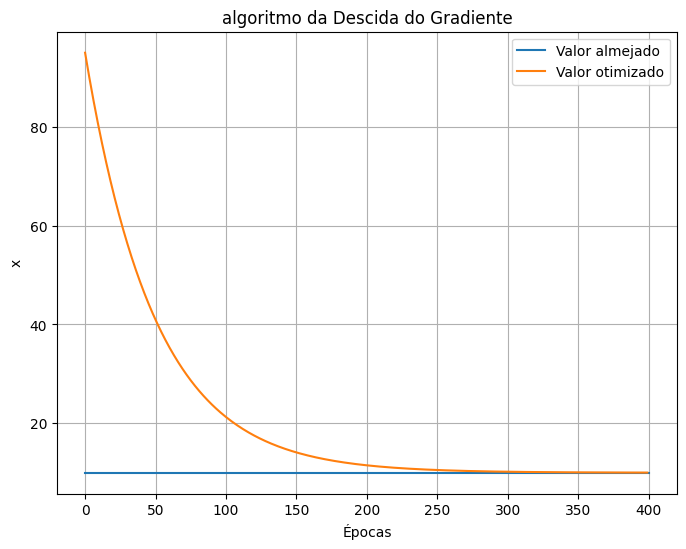

In [ ]:
x_f = 10
#x = np.random.randn()
x = np.random.randint(-100,100)
x_init = x
print(f'Vari√°vel "x" incializada com {x_init}.\n')
eta = 1e-2
history = []
cost = []

# Defini√ß√£o da fun√ß√£o de custo
loss = lambda x: (x - x_f)**2

# dL/dx
delta = 0.0001
dL_dx = lambda x: (loss(x+delta) - loss(x-delta)) / (2*delta)

# Descida de Gradiente
epochs = 400
for i in range(epochs):
  history.append(x)
  cost.append(loss(x))
  x = x - eta*dL_dx(x)

# Plotagem gr√°fica da converg√™ncia
plt.figure(figsize = (8,6))
plt.plot([0, epochs], [x_f, x_f], label = 'Valor almejado')
plt.plot(history, label = 'Valor otimizado')
# plt.ylabel('x', size = 15)
# plt.xlabel('√âpocas', size = 15)
# plt.legend(prop = {'size': 15})
plt.ylabel('x')
plt.xlabel('√âpocas')
plt.title('algoritmo da Descida do Gradiente')
plt.legend()
plt.grid()
plt.show()

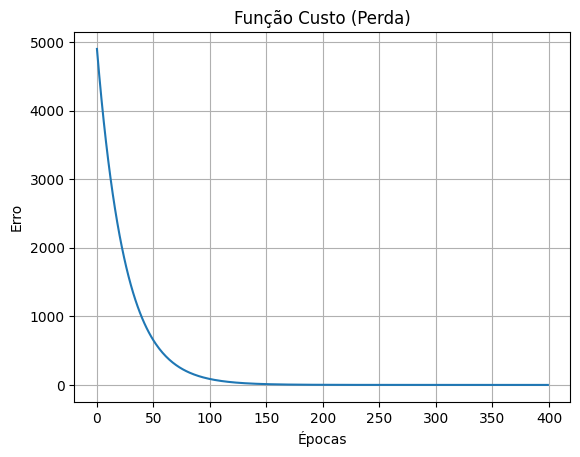

In [ ]:
plt.xlabel('√âpocas')
plt.ylabel('Erro')
plt.title('Fun√ß√£o Custo (Perda)')
plt.grid()
plt.plot(cost)
plt.show()

#Refer√™ncias
1. https://towardsdatascience.com/understanding-the-mathematics-behind-gradient-descent-dde5dc9be06e
2. https://blog.skz.dev/gradient-descent
3. https://www.datacamp.com/tutorial/tutorial-gradient-descent
4. https://builtin.com/data-science/gradient-descent
5. https://medium.com/data-hackers/gradientes-descendentes-na-pr%C3%A1tica-melhor-jeito-de-entender-740ef4ff6c43
6. https://tiagoms.com/posts/gradiente/